# Zootopia: Take-Home Coding Assignment

## Introduction

This little exercise will help us learn about your thought processes and also provide some exposure on some of the challenges you might face.

You should expect to spend no more than **3** hours working on this assignment. Your solutions should demonstrate your ability to write clean, well-documented, but performant code and be knowledgable in the following concepts or technologies: 

```
- Model Building with Tensorflow, Keras 
- Data Preprocessing Methods
- Transfer Learning Concepts
- Hyperparameter Tuning
- Adversarial Attacks
```

### Lore
A zoo in Zootropolis has engaged you to help them set up a custom classification pipeline to monitor their animals through feeds from CCTV installed throughout the zoo.

Furthermore, there are also some concerns sounded off by the zookeepers. Firstly, the animals do not like it when the model is biased against them. Secondly, some animals might plan an escape and launch adversarial attacks on the model to avoid detection. Therefore, some of the tasks are there to address these issues.

Lastly, what is the use of a trained model if we cannot deploy it? Help the zookeepers set up a prediction pipeline to use the model to track the animals in their enclosure 24 7!

### Rules
When attempting this assignment, please adhere to the following rules:

1. You may refer to online sources, but you may not copy code verbatim. Acknowledge these sources where appropriate in code comments.
2. You may not install any additional pip packages.
3. You may not download or rely on datasets other than the one provided.
4. You may create additional cells, but please keep it neat and well-documented.

### Tasks Summary
Here is the summary of the tasks for completion:
1. **Task 1** - Create Custom Data Generator With Augmentation
2. **Task 2** - Pipeline To Dynamically Build Model Based On Blueprint Configuration
3. **Task 3** - Introduce New Class Without Old Data
4. **Task 4** - Develop Hyper Parameter Tuning Strategy
5. **Task 5** - Demonstrate Adversarial Attack On Model

### Dataset
Download the training dataset from https://bit.ly/3LUkAOH.

It should contain two folders - `main/` and `follow-on/`. The purpose of these folders and their subfolders are for:

- **main/** - Contains images of two animals, Squirrel & Butterfly (300 each), for Task 1 - 4
- **follow-on/** - Contains images of one animal, Panda (300 images), for Task 5 

*Do not download or use additional dataset other than the one provided.*

### Getting Started
The partially filled cells available in the notebook serve as a guideline for the assignment. You will need to fill in the missing codes. Feel free to create other cells to segregate any code if you want.

Before you start coding, ensure that you have the following dependencies:

- Python3.7+

Then install the additional pip dependencies in the next cell.

In [ ]:
!pip install albumentations==0.5.2 opencv-python==4.5.5.62 Pillow==9.0.1 scikit-learn==1.0.2 tensorflow==2.3.0

### Import Packages

In [ ]:
import glob
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

# Tasks

## Task 1: Create Custom Data Generator With Augmentation (20 Minutes)

### Objective
The first task is to create a custom data generator for the model training and validation process. Fill in the missing codes in the generator class `CustomDataGenerator`. The data generator should accomplish a couple of things:

- The data set is missing its label, so generate the label on the fly.
- Execution of the data set augmentation should be on the fly.

### Expected Outcome
The data generator class `CustomDataGenerator` must be successfully initialized without errors. Store the initialized class in variables `train_data_generator` and `val_data_generator` for further use.

### Hint
Create a working data generator is easy. You need to pay attention to how the generator deals with the data during training and validation

Use the `Albumentations` library - the type of augmentations you select does not matter in this case

In [ ]:
class CustomDataGenerator(Sequence):
    def __init__(self, # YOUR CODE HERE #):
        """Initialize generator class"""
        
        # fill in any missing code
        
    def __len__(self):
        """Calculate number of batch per epoch"""
    
        # fill in any missing code
    
    def __getitem__(self, index):
        """Generate a single batch of data"""
        
        # fill in any missing code 
        

In [ ]:
def retrieve_dataset(path, shuffle=True, split_ratio=0.7):
    all_files = glob.glob(os.path.join(path, "**/*"))

    if shuffle:
        np.random.shuffle(all_files)

    return train_test_split(all_files, train_size=split_ratio)

In [ ]:
## Initialize Data Generators
# train_data_generator = CustomDataGenerator(....)
# val_data_generator = CustomDataGenerator(....)

## Task 2: Build A Simple Model (10 Minutes)

### Objective
Compile and Fit a model with checkpoint strategies - where the training actually runs

### Custom checkpoint strategies
Furthermore, we want to have the ability to code our own complex crazy model checkpoint strategies by monitoring the training validation loss instead of using those found in `Keras` and `TensorFlow` libraries. The checkpoint strategy to implement for this assignment is to save the model whenever the metric `accuracy` is at its highest or `total loss` is at its lowest. Please propose and code out an idea on how we can best achieve this. Here are expected behaviours:

- Only one model should be saved. Overwrite previously saved model.
- Whenever you save a model, log the metrics into a text file. 

### Expected Outcome
Firstly, check if the model is successfully compiled using `model.summary()`. If so, proceed to train the model using `model.fit()`. Secondly, the model or checkpoint file, together with a text file containing metric values, should be saved during the training process.

### Hint
Keras contains functions that can easily build base models. Keras or TensorFlow already have their own checkpoint strategies.

In [ ]:
def build_model(model_name):
    ## Fill in any missing code below
    
    ## Select requested model based on model name
    # chosen_model = YOUR CODE HERE
    
    ## Build Base / Backbone Model
    base_model = chosen_model(
        weights="imagenet",
        include_top=False,
        input_shape=(width, height, 3),
    )
    
    ## Build Output / Adapter Layer
    # output_layers = YOUR CODE HERE
    
    ## Compile model
    model = models.Model(inputs=base_model.inputs, outputs=output_layers)

    model.compile(
        # optimizer=optimizer(lr=#.... Your Code Here ...#),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    
    return model

In [ ]:
## Build model
model = build_model(training_settings["model"])

## View compiled model architecture
model.summary()

## Train model
model.fit(...)

## Task 3: Continual Learning Discussion (30 Minutes)

A zookeeper wanted to update the model to include a new animal - however, he has lost all of the previous training data that he has painfully collected. The zookeeper came up with the following plan:

- Initialze the model with the existing weights
- Run `.fit` on the current model with the new data to apply transfer learning
- ...
- Profit

Discussion / Presentation :
- What are some of the issues with this approach and how would you advise the zookeeper to deal with the current issue?
- If you were to implement a continual learning, what are some of the conditions and methods you will put into place?

----

## Task 4: Implement Bayesian Optimization (30 Minutes)


### Objective

- Propose and code a hyperparameter tuning technique

Feel free to use KerasTuner (https://keras.io/api/keras_tuner/tuners/bayesian/_ or `bayes_opt` (https://github.com/fmfn/BayesianOptimization)


### Expected Outcome
Training leverages bayesian optimizer that does a hyperparameter search as you train the model - Additional points if you are able explain how your setup can be distributable / scalable in larger trainings


In [1]:
# Your Implementation Here

## Task 5: Implement an Adverserial Patch Attack (30 Minutes)

### Objective
The animals would love to escape. The realize that only pandas have the ability to move in and out of the zoo as they wish. They have decided to full the classifier this time!

However, Fast Gradient Sign Method is overrated - plus, there's no way for the animals in the zoo to really escape with this method. Ideally, you will use `ART` or other libraries to create an adverserial patch tha will allow your model to misclassify the animals.

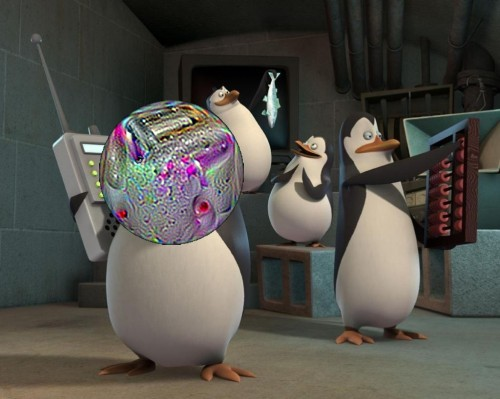

How we imagine this might look - *Bye Suckas*